<a href="https://colab.research.google.com/github/Maria23/An-lisis-enfermedades-cardiovasculares/blob/main/Segundo_an%C3%A1lisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis enfermedades cardiovasculares**

# 1. Carga de datos 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Lectura de datos en Python
datos=pd.read_excel('/content/datos2.xlsx')
datos

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No


In [ ]:
#qué columnas tienen los datos?
datos.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [ ]:
#Qué tamaño tienen los datos?
datos.shape

(319795, 18)

In [ ]:
#Hay valores nulos en los datos?
datos.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

# 2. Anáisis de datos general

In [ ]:
datos.describe ()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [ ]:
datos.groupby(['HeartDisease']).count()['BMI']

HeartDisease
No     292422
Yes     27373
Name: BMI, dtype: int64

In [ ]:
#total número de casos de 319794 pacientes
casos=np.array(datos['HeartDisease']=='Yes')
casos.sum()

27373

# 3. Estudio casos en hombres y mujeres - enfermedad


In [ ]:
datos.groupby(['Sex','HeartDisease']).count()['BMI']

Sex     HeartDisease
Female  No              156571
        Yes              11234
Male    No              135851
        Yes              16139
Name: BMI, dtype: int64

In [ ]:
#total número de mujeres
data_mujeres = datos[(datos['Sex'] == 'Female')]
#aislamos data mujeres

In [ ]:
#total número de hombres
data_hombres = datos[(datos['Sex'] == 'Male')]
#aislamos data hombres

HeartDisease  Sex   
No            Female    156571
              Male      135851
Yes           Female     11234
              Male       16139
Name: BMI, dtype: int64


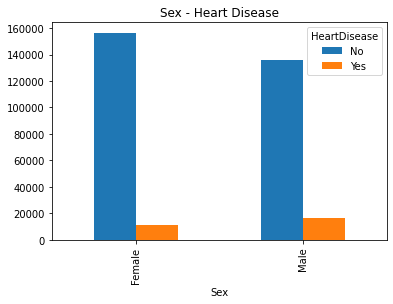

In [ ]:
group_sex=datos.groupby(['HeartDisease','Sex']).count()['BMI']
print(group_sex)
(group_sex.unstack(level=0).plot.bar())
plt.title("Sex - Heart Disease")
plt.show()


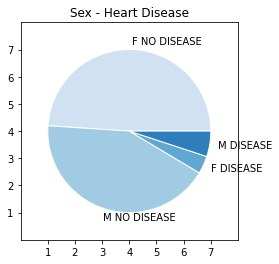

In [ ]:
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(group_sex)))
fig, ax = plt.subplots()
labels = 'F NO DISEASE','M NO DISEASE', 'F DISEASE','M DISEASE'

ax.pie(group_sex, labels=labels, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)
ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))
plt.title("Sex - Heart Disease")
plt.show()

In [ ]:
#la proporción de enfermedad cardiovascular en hombres es ligeramente mayor

# 4. Relación edad - enfermedad


In [ ]:
data_enfermos = datos[(datos['HeartDisease'] == 'Yes')]
data_enfermos
#aislamos las personas enfermas 

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,Yes,28.87,Yes,No,No,6,0,Yes,Female,75-79,Black,No,No,Fair,12,No,No,No
10,Yes,34.30,Yes,No,No,30,0,Yes,Male,60-64,White,Yes,No,Poor,15,Yes,No,No
35,Yes,32.98,Yes,No,Yes,10,0,Yes,Male,75-79,White,Yes,Yes,Poor,4,No,No,Yes
42,Yes,25.06,No,No,No,0,0,Yes,Female,80 or older,White,Yes,No,Good,7,No,No,Yes
43,Yes,30.23,Yes,No,No,6,2,Yes,Female,75-79,White,Yes,Yes,Fair,8,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319765,Yes,38.45,No,No,Yes,30,15,Yes,Female,55-59,Hispanic,Yes,Yes,Poor,6,Yes,No,No
319767,Yes,36.21,Yes,No,No,0,0,Yes,Female,75-79,Hispanic,Yes,Yes,Good,8,No,No,No
319781,Yes,37.12,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,7,No,No,No
319786,Yes,33.20,Yes,No,No,0,0,No,Female,60-64,Hispanic,Yes,Yes,Very good,8,Yes,No,No


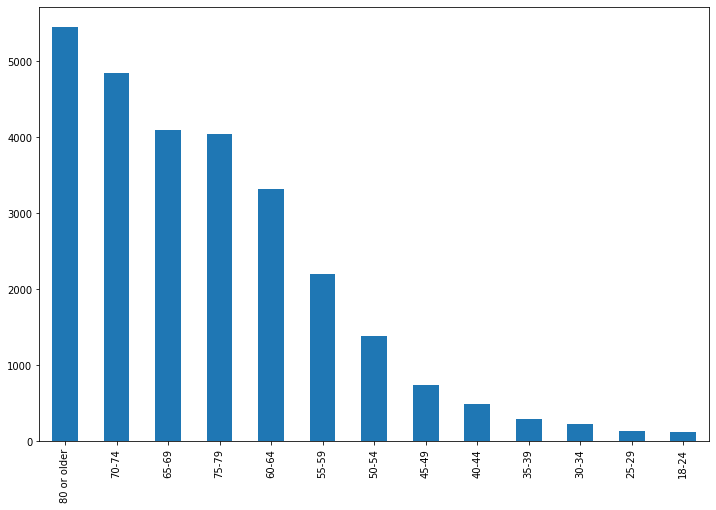

In [ ]:
#edad personas que tienen la enfermedad 
plt.figure(figsize=(12, 8))
data_enfermos['AgeCategory'].value_counts().plot.bar()

# 5. Relación fumadores, bebedores - enfermedad


HeartDisease  Smoking
No            No         176551
              Yes        115871
Yes           No          11336
              Yes         16037
Name: BMI, dtype: int64


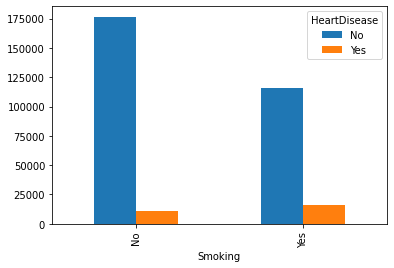

In [ ]:
group_smoking=datos.groupby(['HeartDisease','Smoking']).count()['BMI']
print(group_smoking)
(group_smoking.unstack(level=0).plot.bar())
plt.show()

In [ ]:
data_enfermos = datos[(datos['HeartDisease'] == 'Yes')]
group_smoking_enf=data_enfermos.groupby(['Smoking']).count()['BMI']
group_smoking_enf

Smoking
No     11336
Yes    16037
Name: BMI, dtype: int64

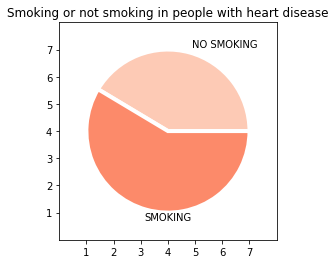

In [ ]:
colors = plt.get_cmap('Reds')(np.linspace(0.2, 0.4, len(group_smoking_enf)))
fig, ax = plt.subplots()
labels = 'NO SMOKING', 'SMOKING'

ax.pie(group_smoking_enf, labels=labels, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 4, "edgecolor": "white"}, frame=True)
ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))
plt.title("Smoking or not smoking in people with heart disease")
plt.show()

In [ ]:
#si hacemos al revés, si vemos las personas que fuman, el porcentaje de los que tienen enfermedad es mayor al de las personas que no fuman y se ve en el primer gráfico 

HeartDisease  AlcoholDrinking
No            No                 271786
              Yes                 20636
Yes           No                  26232
              Yes                  1141
Name: BMI, dtype: int64


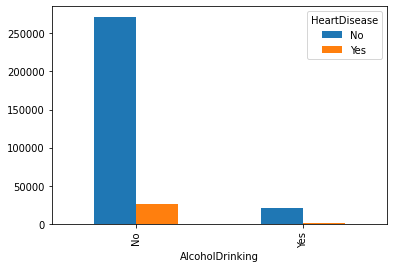

In [ ]:
group_alcohol=datos.groupby(['HeartDisease','AlcoholDrinking']).count()['BMI']
print(group_alcohol)
(group_alcohol.unstack(level=0).plot.bar())

plt.show()

HeartDisease  AlcoholDrinking  Smoking
No            No               No         168440
                               Yes        103346
              Yes              No           8111
                               Yes         12525
Yes           No               No          11085
                               Yes         15147
              Yes              No            251
                               Yes           890
Name: BMI, dtype: int64


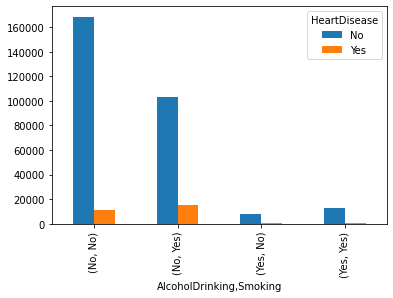

In [ ]:
group_alcohol=datos.groupby(['HeartDisease','AlcoholDrinking','Smoking']).count()['BMI']
print(group_alcohol)
(group_alcohol.unstack(level=0).plot.bar())
plt.show()

# 6. Relación Asthma - Enfermedad Cardiovascular

HeartDisease  Asthma
No            No        254483
              Yes        37939
Yes           No         22440
              Yes         4933
Name: BMI, dtype: int64


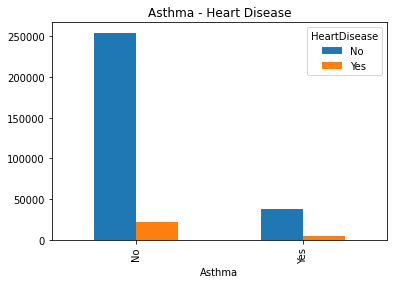

In [ ]:
group_asthma=datos.groupby(['HeartDisease','Asthma']).count()['BMI']
print(group_asthma)
(group_asthma.unstack(level=0).plot.bar())
plt.title("Asthma - Heart Disease")
plt.show()

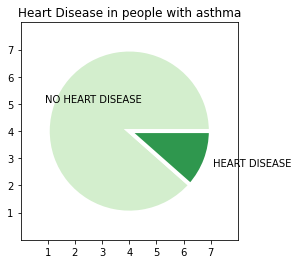

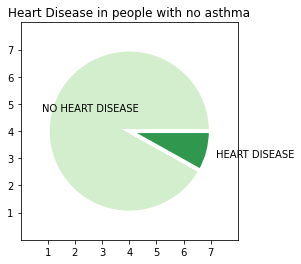

In [ ]:

data_enfermos_asthma = datos[(datos['Asthma'] == 'Yes')]
group_enf2=data_enfermos_asthma.groupby(['HeartDisease']).count()['BMI']
colors = plt.get_cmap('Greens')(np.linspace(0.2, 0.7, len(group_enf2)))
fig, ax = plt.subplots()
labels = 'NO HEART DISEASE', 'HEART DISEASE'
ax.pie(group_enf2, labels=labels, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 4, "edgecolor": "white"}, frame=True)
ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))
plt.title("Heart Disease in people with asthma")


data_noenfermos_asthma = datos[(datos['Asthma'] == 'No')]
group_enf3=data_noenfermos_asthma.groupby(['HeartDisease']).count()['BMI']
colors = plt.get_cmap('Greens')(np.linspace(0.2, 0.7, len(group_enf3)))
fig, ax = plt.subplots()
labels = 'NO HEART DISEASE', 'HEART DISEASE'
ax.pie(group_enf3, labels=labels, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 4, "edgecolor": "white"}, frame=True)
ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))
plt.title("Heart Disease in people with no asthma")
plt.show()

In [ ]:
data_enfermos_asthma = datos[(datos['Asthma'] == 'Yes')]
data_noenfermos_asthma = datos[(datos['Asthma'] == 'No')]
num_enfermos_asthma=data_enfermos_asthma.count()['BMI']
num_noenfermos_asthma=data_noenfermos_asthma.count()['BMI']
num_enfermos_heart_conasthma = data_enfermos_asthma[(data_enfermos_asthma['HeartDisease'] == 'Yes')].count()['BMI']
num_enfermos_heart_sinasthma = data_noenfermos_asthma[(data_noenfermos_asthma['HeartDisease'] == 'Yes')].count()['BMI']
p_asthma_heart=(num_enfermos_heart_conasthma/num_enfermos_asthma)*100
p_noasthma_heart=(num_enfermos_heart_sinasthma/num_noenfermos_asthma)*100
print('Porcentaje enfermedad cardiovascular para personas con asthma:',p_asthma_heart)
print('Porcentaje enfermedad cardiovascular para personas sin asthma:',p_noasthma_heart)
#OBSERVAMOS QUE CUANDO SE TIENE ASTHMA ES MÁS PROPABLE TENER ENFERMEDAD DARDIOVASCULAR 

Porcentaje enfermedad cardiovascular para personas con asthma: 11.506344467251353
Porcentaje enfermedad cardiovascular para personas sin asthma: 8.103335584259884


# 7. Relación Diabéticos - Enfermedad Cardiovascular


HeartDisease  Diabetic               
No            No                         252134
              No, borderline diabetes      5992
              Yes                         31845
              Yes (during pregnancy)       2451
Yes           No                          17519
              No, borderline diabetes       789
              Yes                          8957
              Yes (during pregnancy)        108
Name: BMI, dtype: int64


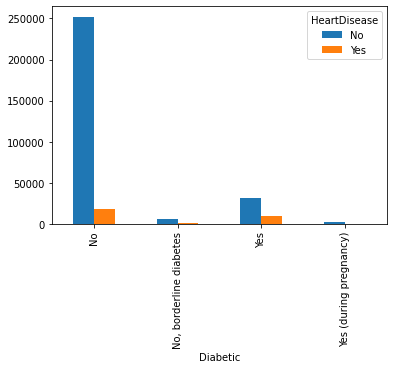

In [ ]:
group_diabetic=datos.groupby(['HeartDisease','Diabetic']).count()['BMI']
print(group_diabetic)
(group_diabetic.unstack(level=0).plot.bar())
plt.show()

In [ ]:
#siendo diabético es más probable tener enfermedad cardiovascular?

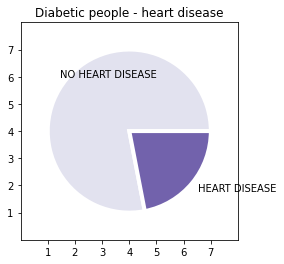

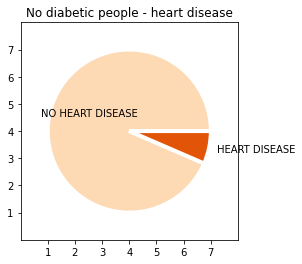

In [ ]:
data_enfermos_diab = datos[(datos['Diabetic'] == 'Yes')]
group_diabetic=data_enfermos_diab.groupby(['HeartDisease']).count()['BMI']
colors = plt.get_cmap('Purples')(np.linspace(0.2, 0.7, len(group_diabetic)))
fig, ax = plt.subplots()
labels = 'NO HEART DISEASE', 'HEART DISEASE'

ax.pie(group_diabetic, labels=labels, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 4, "edgecolor": "white"}, frame=True)
ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))
plt.title("Diabetic people - heart disease")
plt.show()
data_noenfermos_diab = datos[(datos['Diabetic'] == 'No')]
group_nodiabetic=data_noenfermos_diab.groupby(['HeartDisease']).count()['BMI']
colors = plt.get_cmap('Oranges')(np.linspace(0.2, 0.7, len(group_diabetic)))
fig, ax = plt.subplots()
labels = 'NO HEART DISEASE', 'HEART DISEASE'

ax.pie(group_nodiabetic, labels=labels, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 4, "edgecolor": "white"}, frame=True)
ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))
plt.title("No diabetic people - heart disease")
plt.show()

In [ ]:
data_enfermos_diab = datos[(datos['Diabetic'] == 'Yes')]
data_noenfermos_diab = datos[(datos['Diabetic'] == 'No')]
num_enfermos_diab=data_enfermos_diab.count()['BMI']
num_noenfermos_diab=data_noenfermos_diab.count()['BMI']
num_enfermos_heart_condiab = data_enfermos_diab[(data_enfermos_diab['HeartDisease'] == 'Yes')].count()['BMI']
num_enfermos_heart_sindiab = data_noenfermos_diab[(data_noenfermos_diab['HeartDisease'] == 'Yes')].count()['BMI']
p_diab_heart=(num_enfermos_heart_condiab/num_enfermos_diab)*100
p_nodiab_heart=(num_enfermos_heart_sindiab/num_noenfermos_diab)*100
print('Porcentaje enfermedad cardiovascular para personas con diabetes:',p_diab_heart)
print('Porcentaje enfermedad cardiovascular para personas sin diabetes:',p_nodiab_heart)

Porcentaje enfermedad cardiovascular para personas con diabetes: 21.952355276702125
Porcentaje enfermedad cardiovascular para personas sin diabetes: 6.4968681972757585


In [ ]:
#OBSERVAMOS QUE CUANDO SE ES DIABETICO ES MÁS PROBABLE TENER UNA ENFERMEDAD CARDIOVASCULAR QUE CUANDO NO SE ES

# 8. Relación BMI - Enfermedad Cardiovascular

In [ ]:
data_enfermos = datos[(datos['HeartDisease'] == 'Yes')]
data_noenfermos = datos[(datos['HeartDisease'] == 'No')]
plt.figure(figsize=(25, 8))
repetitios_BMI=data_enfermos['BMI'].value_counts()
repetitios_BMI


26.63    293
27.12    232
29.53    195
24.41    189
27.44    185
        ... 
47.59      1
22.57      1
40.56      1
41.52      1
35.92      1
Name: BMI, Length: 2194, dtype: int64

<Figure size 1800x576 with 0 Axes>

In [ ]:
#media de 
BMI_enfermos=np.array(data_enfermos['BMI'])
BMI_noenfermos=np.array(data_noenfermos['BMI'])
print(BMI_enfermos)
print(BMI_noenfermos)
print('media enfermos: ',BMI_enfermos.mean())
print('media no enfermos: ',BMI_noenfermos.mean())
print('std enfermos: ',BMI_enfermos.std())
print('std no enfermos: ',BMI_noenfermos.std())

[28.87 34.3  32.98 ... 37.12 33.2  27.41]
[16.6  20.34 26.58 ... 24.24 32.81 46.56]
media enfermos:  29.401592079786653
media no enfermos:  28.224658336240093
std enfermos:  6.5770306497203315
std no enfermos:  6.3256493121323505


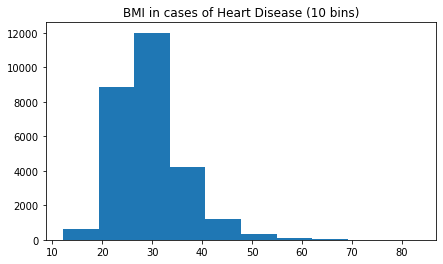

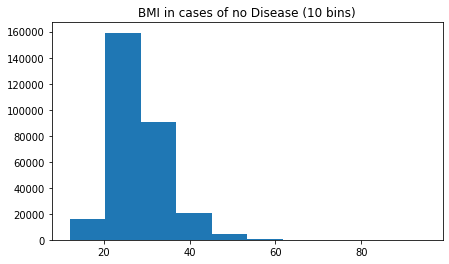

In [ ]:
plt.figure(figsize=(7, 4))
plt.hist(BMI_enfermos,bins=10)
plt.title("BMI in cases of Heart Disease (10 bins)")
plt.show()
plt.figure(figsize=(7, 4))
plt.hist(BMI_noenfermos,bins=10)
plt.title("BMI in cases of no Disease (10 bins)")
plt.show()

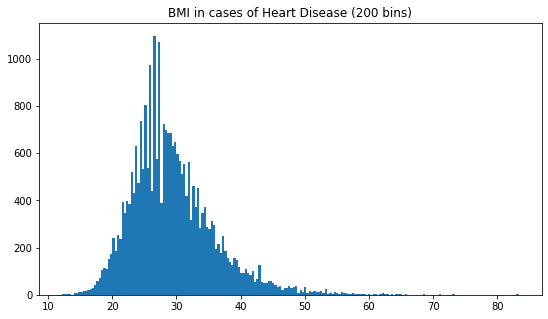

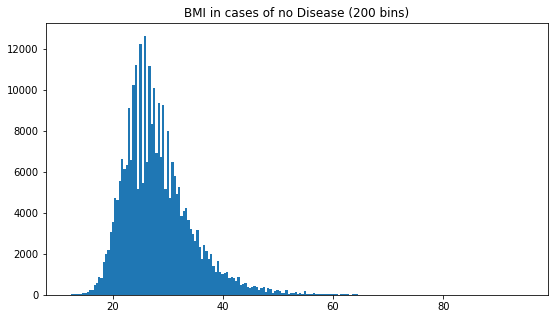

In [ ]:
plt.figure(figsize=(9, 5))
plt.hist(BMI_enfermos,bins=200)
plt.title("BMI in cases of Heart Disease (200 bins)")
plt.show()
plt.figure(figsize=(9, 5))
plt.hist(BMI_noenfermos,bins=200)
plt.title("BMI in cases of no Disease (200 bins)")
plt.show()

In [ ]:
#en ambos casos los BMI se concentran en el valor de 30, por lo que no parece que sea el BMI un indicador importante de enfermedades cardiovasculares

# 9. Relación Salud física - Salud mental (ver scatter plot)

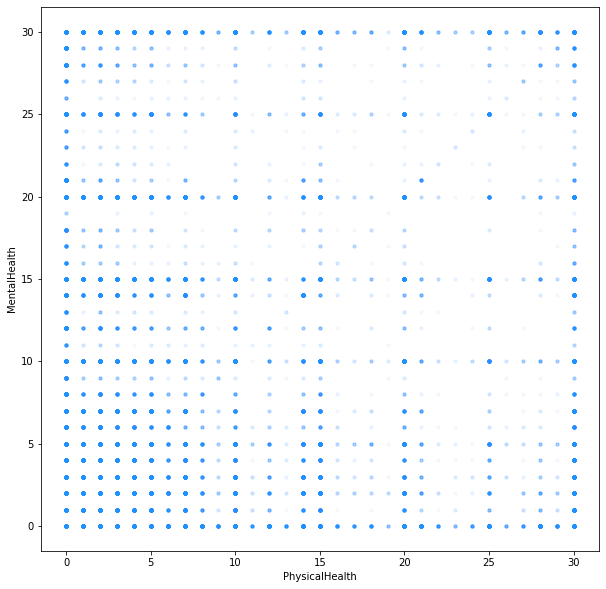

In [ ]:
datos.plot(kind='scatter', x='PhysicalHealth', y='MentalHealth', \
        color='dodgerblue', figsize=(10,10), s=10, alpha=0.04 )
#se observa una concentración en el extremo inferior izquierdo, lo que indica que por lo general una baja salud física va acompañada de una baja salud mental y viceversa
